In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

### 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [4]:
def calc_logloss(y, y_pred, delta = 1e-15):    
    y_pred[y_pred==0] += delta
    y_pred[y_pred==1] -= delta
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [8]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [76]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    err_history = []
    min_err = 100
    n_iter = None
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        
        if err < min_err:
            n_iter, min_err = i, err
        err_history.append(err)
    print(f'Min(log_loss) at learning_rate={alpha} is {round(min_err, 4)}, at {n_iter} iterations')
    return W, err_history

In [77]:
def plot (t, alpha_list, model=eval_model):
    dots = np.linspace(0, t, t)
    plt.xlabel('Number of inerations')
    plt.ylabel('Error')


    for alpha in alpha_list:
        _, err_history = model(X, y, t, alpha)
        plt.plot(dots, err_history)

    plt.legend(['alpha=' + str(i) for i in alpha_list])
    plt.show()

Min(log_loss) at learning_rate=0.1 is 13.8158, at 6542 iterations
Min(log_loss) at learning_rate=0.01 is 0.6038, at 105 iterations
Min(log_loss) at learning_rate=0.001 is 0.6049, at 426 iterations
Min(log_loss) at learning_rate=0.0001 is 1.1267, at 46 iterations


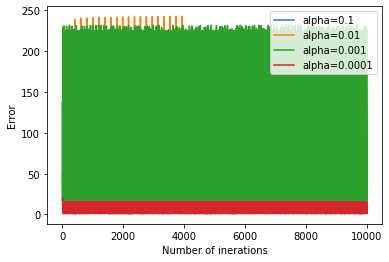

In [79]:
t = 10000
alpha_list = [0.1, 1e-2, 1e-3, 1e-4]
plot (t, alpha_list)

### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [12]:
def calc_pred_proba(W, X):
    y_pred = 1 / (1 + np.exp(-np.dot(W, X)))
    return y_pred

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [24]:
def calc_pred(W, X, level=0.5):
    y_pred = calc_pred_proba(W, X)  
    y_pred[y_pred >= level] = 1
    y_pred[y_pred < level] = 0
    return y_pred

### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.


In [48]:
def accuracy(y, y_pred):
    acc = (y_pred == y).sum()/len(y)
    return acc

def metrics(y, y_pred):
    TP = y[(y - y_pred) == 0].sum()
    FP = ((y - y_pred) == -1).sum()
    TN = (y[(y - y_pred) == 0]==0).sum()
    FN = ((y - y_pred) == 1).sum()
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1_score = 2 * precision * recall / (precision + recall)
    
    print(f'precision = {precision}')
    print(f'recall = {recall}')
    print(f'F1_score = {F1_score}')
    
    return np.array([[TP.sum(), FP.sum()], 
                     [FN.sum(), TN.sum()]])
 
    

    

In [49]:
W = eval_model(X, y, iterations=1000)
y_pred = calc_pred(W, X)

accuracy(y, y_pred)
metrics(y, y_pred)

1000 [ 0.49177594 -0.14548261  0.03499467  1.53137498] 1.2756825174748638
precision = 0.5
recall = 1.0
F1_score = 0.6666666666666666


array([[5., 5.],
       [0., 0.]])

### 6. Могла ли модель переобучиться? Почему?

Модель могла переобучиться из-за малой выборки. Она слишком хорошо ее изучила и на новых данных могут быть большие ошибки. Также проблема из-за того, что не используется регуляризация. 